In [1]:
import os
import sys


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:
from sklearn.inspection import permutation_importance

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.feature_selection import SelectFromModel

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from statsmodels.regression.linear_model import OLS

In [9]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

In [10]:
from spectroscopy.utils import load_training_data, get_wavelength_columns
from spectroscopy.model import score_model

# modeling

note: "I think the best is the ground samples from South"

# load in data

In [11]:
df = load_training_data()

In [12]:
df.columns

Index(['862.13', '863.88', '865.63', '867.38', '869.13', '870.88', '872.63',
       '874.38', '876.13', '877.88',
       ...
       '1749.38', '1751.13', '1752.88', 'extra_info', 'filename',
       'sample_name', 'sample_date', 'run_number', 'process_method',
       'Ammonia-N'],
      dtype='object', length=517)

In [13]:
feature_columns = get_wavelength_columns(df)

In [14]:
X, y = df[feature_columns], df['Ammonia-N']

In [15]:
y.value_counts(dropna=False)

0.15    6
0.37    6
0.42    6
0.39    6
0.20    6
0.44    6
0.12    6
0.32    6
0.21    6
2.24    3
0.57    3
Name: Ammonia-N, dtype: int64

In [16]:
y.describe()

count    60.000000
mean      0.402500
std       0.443437
min       0.120000
25%       0.200000
50%       0.345000
75%       0.420000
max       2.240000
Name: Ammonia-N, dtype: float64

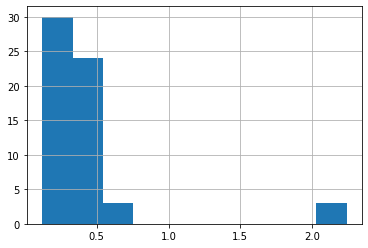

In [17]:
y.hist()

In [18]:
X.describe()

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,1737.13,1738.88,1740.63,1742.38,1744.13,1745.88,1747.63,1749.38,1751.13,1752.88
count,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,...,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1.000000e-03,1.000000e-03,1.000000e-03,-22.376158,-79.282372,-9.747710,61.435517,63.454850,63.060100,61.42710,...,56.62385,56.740450,56.854950,56.978800,57.084133,57.172933,57.255483,57.334700,57.411633,57.492417
std,6.560110e-19,6.560110e-19,6.560110e-19,98.681245,386.412083,224.213526,10.037716,10.169806,10.130332,10.00967,...,10.59067,10.592262,10.586519,10.573621,10.567218,10.573909,10.585283,10.590813,10.597759,10.589627
min,1.000000e-03,1.000000e-03,1.000000e-03,-219.800000,-831.610000,-424.710000,35.295000,36.586000,36.099000,34.59200,...,29.97700,30.166000,30.291000,30.434000,30.538000,30.640000,30.768000,30.876000,30.999000,31.153000
25%,1.000000e-03,1.000000e-03,1.000000e-03,-18.137000,-65.816750,-19.444250,57.511250,59.920000,59.390250,57.89625,...,51.86325,52.008000,52.149250,52.285750,52.410750,52.500500,52.541750,52.556000,52.591000,52.664000
50%,1.000000e-03,1.000000e-03,1.000000e-03,6.192950,25.124500,32.943000,64.552000,66.510000,66.011500,64.26450,...,59.36900,59.539500,59.682000,59.825000,59.948500,60.056500,60.160000,60.293500,60.483500,60.625500
75%,1.000000e-03,1.000000e-03,1.000000e-03,33.206000,116.542500,88.267500,67.844750,69.713500,69.314750,67.67650,...,62.91000,63.065500,63.205500,63.340750,63.451250,63.566250,63.668750,63.733750,63.787250,63.845750
max,1.000000e-03,1.000000e-03,1.000000e-03,101.090000,464.490000,369.440000,76.971000,78.993000,78.589000,76.93000,...,73.40500,73.463000,73.491000,73.553000,73.608000,73.651000,73.713000,73.801000,73.876000,73.898000


In [19]:
len(X.columns)

510

this is too many columns, too many features for linear regression. lets try a tree based model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [21]:
len(X_test), len(y_test)

(18, 18)

In [22]:
len(X_train), len(y_train)

(42, 42)

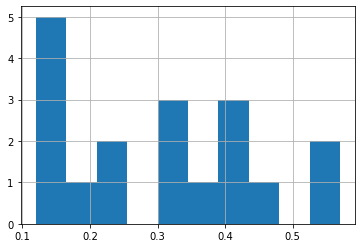

In [23]:
y_test.hist()

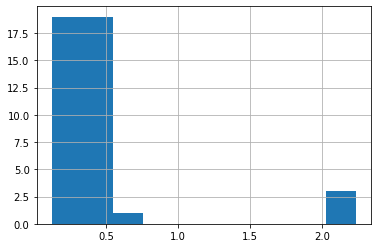

In [24]:
y_train.hist()

# fit baseline model to raw data

In [25]:
model = RandomForestRegressor(random_state=10, max_depth=5, n_estimators=10)

In [26]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=10)

# score model

In [27]:
# feature_names = X_train.columns
# result = permutation_importance(model, X_train, y_train, n_repeats=10,
#                                 random_state=42)
# perm_sorted_idx = result.importances_mean.argsort()

# tree_importance_sorted_idx = np.argsort(model.feature_importances_)
# tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# ax1.barh(tree_indices,
#          model.feature_importances_[tree_importance_sorted_idx], height=0.7)
# ax1.set_yticklabels(feature_names[tree_importance_sorted_idx])
# ax1.set_yticks(tree_indices)
# ax1.set_ylim((0, len(model.feature_importances_)))
# ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
#             labels=feature_names[perm_sorted_idx])
# fig.tight_layout()
# plt.show()

In [28]:
# def score_model(model, X_train, y_train, X_test, y_test):
#     return {
#         'train_r2':model.score(X_train, y_train),
#         'train_rms3':np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
#         'test_r2':model.score(X_test, y_test),
#         'test_rmse':np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
#     }

In [29]:
score_model(model, X_train, y_train, X_test, y_test)

{'train_r2': 0.9952928299053715,
 'train_rms3': 0.035107916744219494,
 'test_r2': 0.753345138375459,
 'test_rmse': 0.06990791009670655}

# select K best features based on feature importance

In [30]:
feature_selector = SelectFromModel(model, prefit=True)

In [31]:
X_train_selected = feature_selector.transform(X_train)

In [32]:
X_train_selected.shape

(42, 19)

In [33]:
len(feature_selector.get_support())

510

In [34]:
selected_features = X_test.columns[feature_selector.get_support()]

In [35]:
selected_features

Index(['867.38', '872.63', '874.38', '916.38', '933.88', '956.63', '972.38',
       '1045.88', '1054.63', '1079.13', '1119.38', '1234.88', '1325.88',
       '1367.88', '1380.13', '1451.88', '1625.13', '1637.38', '1654.88'],
      dtype='object')

In [36]:
X_test_selected = X_test[selected_features]

In [37]:
model.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=10)

In [38]:
score_model(model, X_train_selected, y_train, X_test_selected, y_test)

{'train_r2': 0.9952892222578713,
 'train_rms3': 0.03512136779090612,
 'test_r2': 0.763757680653316,
 'test_rmse': 0.06841641727021744}

this might be too many variable for a linear regression to handle. We might need to do some feature engineering to downsample these OR we can try using a model that will handle them better. but let's see how it does.

# plot residuals

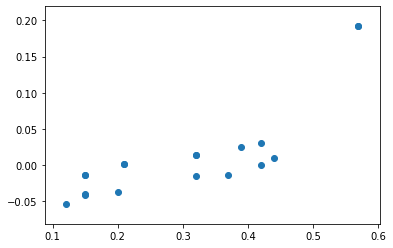

In [39]:
plt.scatter(y_test, y_test-model.predict(X_test_selected))

In [40]:
# regressor_OLS = OLS(endog = y_train, exog = X_train).fit()
# regressor_OLS.summary()

In [41]:
# lets fill some nA

In [42]:
# lr = LinearRegression()

In [43]:
# lr.fit(X, y)